<a href="https://colab.research.google.com/github/sherry-ml/EVA7/blob/main/Final_Submission_Session7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import StepLR,OneCycleLR
from tqdm import tqdm
import torch.nn as nn
import numpy as  np

In [2]:
!pip install torchsummary
from torchsummary import summary

In [3]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

     |████████████████████████████████| 102 kB 14.7 MB/s 
     |████████████████████████████████| 47.6 MB 65 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/EVA7/Session_7

/content/drive/MyDrive/EVA7/Session_7


In [6]:
pwd

'/content/drive/MyDrive/EVA7/Session_7'

In [7]:
import model_class, train_model, test_model, model_training, utility
from model_class import Net
from train_model import train
from test_model import test
from model_training import train_test_model
from utility import default_DL, set_compose_params, tl_ts_mod
from utility import C_10_DS

In [8]:
trl, trs = default_DL()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog  deer  deer  frog


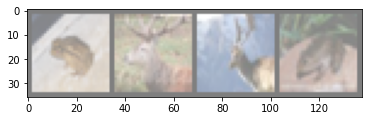

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trl)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
mean = list(np.round(trs.data.mean(axis=(0,1,2))/255, 4))
mean

[0.4914, 0.4822, 0.4465]

In [11]:
std = list(np.round(trs.data.std(axis=(0,1,2))/255,4))
std

[0.247, 0.2435, 0.2616]

In [12]:
transform_train, transform_valid = set_compose_params(mean, std)

In [13]:
trainset_mod, trainloader_mod, testset_mod, testloader_mod = tl_ts_mod(transform_train,transform_valid)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [14]:
len(testset_mod), len(trainset_mod)

(10000, 50000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 frog horse horse horse


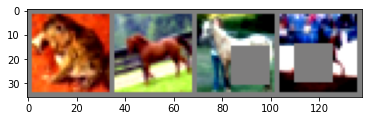

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader_mod)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
features, labels = next(iter(trainloader_mod))

In [17]:
features.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

### Main Code Block starts

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [19]:
def view_model_summary(dropout, norm_type='BN'):
  test_model = Net(dropout, norm_type).to(device)
  summary(test_model, input_size=(3, 32, 32))
  print(test_model)

In [20]:
view_model_summary(0.1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 31, 31]          32,768
       BatchNorm2d-6           [-1, 64, 31, 31]             128
              ReLU-7           [-1, 64, 31, 31]               0
         Dropout2d-8           [-1, 64, 31, 31]               0
            Conv2d-9           [-1, 32, 15, 15]          18,464
      BatchNorm2d-10           [-1, 32, 15, 15]              64
             ReLU-11           [-1, 32, 15, 15]               0
        Dropout2d-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 32, 15, 15]           9,216
      BatchNorm2d-14           [-1, 32,

In [21]:
net = train_test_model(trainloader_mod, testloader_mod, 'BN', 200, 0.005,0.002, device )

Net(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout2d(p=0.005, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout2d(p=0.005, inplace=False)
  )
  (trans1): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout2d(p=0.005, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
 

100%|██████████| 391/391 [00:11<00:00, 34.53it/s]


 Average Training Loss=1.743048701171875, Accuracy=40.046



Test set: Average loss: 1.3344, Accuracy: 5306/10000 (53.06%)

EPOCH: 1


100%|██████████| 391/391 [00:11<00:00, 34.19it/s]


 Average Training Loss=1.4313392465209962, Accuracy=52.03



Test set: Average loss: 1.1843, Accuracy: 5914/10000 (59.14%)

EPOCH: 2


100%|██████████| 391/391 [00:11<00:00, 34.40it/s]


 Average Training Loss=1.2847948837280274, Accuracy=57.874



Test set: Average loss: 1.0169, Accuracy: 6480/10000 (64.80%)

EPOCH: 3


100%|██████████| 391/391 [00:11<00:00, 34.56it/s]


 Average Training Loss=1.1924248204040528, Accuracy=61.48



Test set: Average loss: 0.8945, Accuracy: 6967/10000 (69.67%)

EPOCH: 4


100%|██████████| 391/391 [00:11<00:00, 35.18it/s]


 Average Training Loss=1.129665104675293, Accuracy=63.804



Test set: Average loss: 0.8526, Accuracy: 7147/10000 (71.47%)

EPOCH: 5


100%|██████████| 391/391 [00:11<00:00, 34.48it/s]


 Average Training Loss=1.0855162767028808, Accuracy=65.684



Test set: Average loss: 0.7896, Accuracy: 7318/10000 (73.18%)

EPOCH: 6


100%|██████████| 391/391 [00:11<00:00, 34.88it/s]


 Average Training Loss=1.0549734454345703, Accuracy=66.736



Test set: Average loss: 0.8156, Accuracy: 7205/10000 (72.05%)

EPOCH: 7


100%|██████████| 391/391 [00:11<00:00, 34.09it/s]


 Average Training Loss=1.0317695433044434, Accuracy=67.766



Test set: Average loss: 0.7444, Accuracy: 7471/10000 (74.71%)

EPOCH: 8


100%|██████████| 391/391 [00:11<00:00, 33.74it/s]


 Average Training Loss=1.0093076124572753, Accuracy=68.67



Test set: Average loss: 0.7064, Accuracy: 7611/10000 (76.11%)

EPOCH: 9


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]


 Average Training Loss=0.9892002268981933, Accuracy=69.49



Test set: Average loss: 0.7147, Accuracy: 7543/10000 (75.43%)

EPOCH: 10


100%|██████████| 391/391 [00:11<00:00, 34.10it/s]


 Average Training Loss=0.9787363763427734, Accuracy=69.988



Test set: Average loss: 0.6919, Accuracy: 7660/10000 (76.60%)

EPOCH: 11


100%|██████████| 391/391 [00:11<00:00, 34.66it/s]


 Average Training Loss=0.9655319021606446, Accuracy=70.746



Test set: Average loss: 0.6748, Accuracy: 7687/10000 (76.87%)

EPOCH: 12


100%|██████████| 391/391 [00:11<00:00, 34.29it/s]


 Average Training Loss=0.9548906799316407, Accuracy=70.964



Test set: Average loss: 0.6453, Accuracy: 7808/10000 (78.08%)

EPOCH: 13


100%|██████████| 391/391 [00:11<00:00, 33.91it/s]


 Average Training Loss=0.9423099032592773, Accuracy=71.668



Test set: Average loss: 0.6651, Accuracy: 7720/10000 (77.20%)

EPOCH: 14


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


 Average Training Loss=0.9429505078125, Accuracy=71.59



Test set: Average loss: 0.6478, Accuracy: 7825/10000 (78.25%)

EPOCH: 15


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]


 Average Training Loss=0.9171486306762695, Accuracy=72.592



Test set: Average loss: 0.6366, Accuracy: 7854/10000 (78.54%)

EPOCH: 16


100%|██████████| 391/391 [00:11<00:00, 34.20it/s]


 Average Training Loss=0.9160555520629883, Accuracy=72.85



Test set: Average loss: 0.6271, Accuracy: 7881/10000 (78.81%)

EPOCH: 17


100%|██████████| 391/391 [00:11<00:00, 34.64it/s]


 Average Training Loss=0.9166309881591796, Accuracy=72.84



Test set: Average loss: 0.6022, Accuracy: 7997/10000 (79.97%)

EPOCH: 18


100%|██████████| 391/391 [00:11<00:00, 33.72it/s]


 Average Training Loss=0.9060423889160156, Accuracy=73.224



Test set: Average loss: 0.6126, Accuracy: 7897/10000 (78.97%)

EPOCH: 19


100%|██████████| 391/391 [00:11<00:00, 34.06it/s]


 Average Training Loss=0.8966260279846191, Accuracy=73.716



Test set: Average loss: 0.6143, Accuracy: 7922/10000 (79.22%)

EPOCH: 20


100%|██████████| 391/391 [00:11<00:00, 34.47it/s]


 Average Training Loss=0.8882108027648926, Accuracy=74.238



Test set: Average loss: 0.6048, Accuracy: 7933/10000 (79.33%)

EPOCH: 21


100%|██████████| 391/391 [00:11<00:00, 34.16it/s]


 Average Training Loss=0.8875329194641113, Accuracy=73.968



Test set: Average loss: 0.5849, Accuracy: 8024/10000 (80.24%)

EPOCH: 22


100%|██████████| 391/391 [00:11<00:00, 33.72it/s]


 Average Training Loss=0.8779127780151367, Accuracy=74.476



Test set: Average loss: 0.5795, Accuracy: 8040/10000 (80.40%)

EPOCH: 23


100%|██████████| 391/391 [00:11<00:00, 34.02it/s]


 Average Training Loss=0.8785540657043457, Accuracy=74.766



Test set: Average loss: 0.6073, Accuracy: 7991/10000 (79.91%)

EPOCH: 24


100%|██████████| 391/391 [00:11<00:00, 34.72it/s]


 Average Training Loss=0.8713860542297364, Accuracy=74.952



Test set: Average loss: 0.5738, Accuracy: 8049/10000 (80.49%)

EPOCH: 25


100%|██████████| 391/391 [00:11<00:00, 34.62it/s]


 Average Training Loss=0.8615108049011231, Accuracy=75.252



Test set: Average loss: 0.5650, Accuracy: 8088/10000 (80.88%)

EPOCH: 26


100%|██████████| 391/391 [00:11<00:00, 33.96it/s]


 Average Training Loss=0.8614658264160157, Accuracy=75.168



Test set: Average loss: 0.5772, Accuracy: 8036/10000 (80.36%)

EPOCH: 27


100%|██████████| 391/391 [00:11<00:00, 34.33it/s]


 Average Training Loss=0.8609205363464355, Accuracy=75.316



Test set: Average loss: 0.5611, Accuracy: 8123/10000 (81.23%)

EPOCH: 28


100%|██████████| 391/391 [00:11<00:00, 35.06it/s]


 Average Training Loss=0.8595839588928222, Accuracy=75.486



Test set: Average loss: 0.5518, Accuracy: 8100/10000 (81.00%)

EPOCH: 29


100%|██████████| 391/391 [00:11<00:00, 34.05it/s]


 Average Training Loss=0.8602963484191894, Accuracy=75.448



Test set: Average loss: 0.5858, Accuracy: 8013/10000 (80.13%)

EPOCH: 30


100%|██████████| 391/391 [00:11<00:00, 34.40it/s]


 Average Training Loss=0.8535981240844727, Accuracy=75.766



Test set: Average loss: 0.5486, Accuracy: 8102/10000 (81.02%)

EPOCH: 31


100%|██████████| 391/391 [00:11<00:00, 33.93it/s]


 Average Training Loss=0.8502979649353027, Accuracy=75.926



Test set: Average loss: 0.5757, Accuracy: 8049/10000 (80.49%)

EPOCH: 32


100%|██████████| 391/391 [00:11<00:00, 33.70it/s]


 Average Training Loss=0.8480434075927734, Accuracy=76.034



Test set: Average loss: 0.5540, Accuracy: 8112/10000 (81.12%)

EPOCH: 33


100%|██████████| 391/391 [00:11<00:00, 34.86it/s]


 Average Training Loss=0.8432826330566406, Accuracy=76.19



Test set: Average loss: 0.5443, Accuracy: 8166/10000 (81.66%)

EPOCH: 34


100%|██████████| 391/391 [00:11<00:00, 33.98it/s]


 Average Training Loss=0.8443644245910644, Accuracy=76.16



Test set: Average loss: 0.5451, Accuracy: 8143/10000 (81.43%)

EPOCH: 35


100%|██████████| 391/391 [00:11<00:00, 35.05it/s]


 Average Training Loss=0.8346058360290527, Accuracy=76.472



Test set: Average loss: 0.5289, Accuracy: 8193/10000 (81.93%)

EPOCH: 36


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


 Average Training Loss=0.8400029479980469, Accuracy=76.364



Test set: Average loss: 0.5311, Accuracy: 8204/10000 (82.04%)

EPOCH: 37


100%|██████████| 391/391 [00:11<00:00, 34.22it/s]


 Average Training Loss=0.8425741990661622, Accuracy=76.488



Test set: Average loss: 0.5432, Accuracy: 8123/10000 (81.23%)

EPOCH: 38


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]


 Average Training Loss=0.8306723072814941, Accuracy=77.034



Test set: Average loss: 0.5318, Accuracy: 8198/10000 (81.98%)

EPOCH: 39


100%|██████████| 391/391 [00:11<00:00, 34.37it/s]


 Average Training Loss=0.8374483692932129, Accuracy=76.872



Test set: Average loss: 0.5271, Accuracy: 8202/10000 (82.02%)

EPOCH: 40


100%|██████████| 391/391 [00:11<00:00, 33.87it/s]


 Average Training Loss=0.8306410760498046, Accuracy=76.912



Test set: Average loss: 0.5446, Accuracy: 8157/10000 (81.57%)

EPOCH: 41


100%|██████████| 391/391 [00:11<00:00, 34.48it/s]


 Average Training Loss=0.8291857905578613, Accuracy=76.906



Test set: Average loss: 0.5467, Accuracy: 8167/10000 (81.67%)

EPOCH: 42


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]


 Average Training Loss=0.8204360247802734, Accuracy=77.198



Test set: Average loss: 0.5841, Accuracy: 8077/10000 (80.77%)

EPOCH: 43


100%|██████████| 391/391 [00:11<00:00, 34.49it/s]


 Average Training Loss=0.8189969035339355, Accuracy=77.196



Test set: Average loss: 0.5363, Accuracy: 8199/10000 (81.99%)

EPOCH: 44


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]


 Average Training Loss=0.816685072631836, Accuracy=77.444



Test set: Average loss: 0.5289, Accuracy: 8203/10000 (82.03%)

EPOCH: 45


100%|██████████| 391/391 [00:11<00:00, 33.83it/s]


 Average Training Loss=0.8252322946166992, Accuracy=77.308



Test set: Average loss: 0.5279, Accuracy: 8230/10000 (82.30%)

EPOCH: 46


100%|██████████| 391/391 [00:11<00:00, 33.94it/s]


 Average Training Loss=0.8189435659790039, Accuracy=77.552



Test set: Average loss: 0.5455, Accuracy: 8124/10000 (81.24%)

EPOCH: 47


100%|██████████| 391/391 [00:11<00:00, 34.28it/s]


 Average Training Loss=0.815895991973877, Accuracy=77.624



Test set: Average loss: 0.5087, Accuracy: 8246/10000 (82.46%)

EPOCH: 48


100%|██████████| 391/391 [00:11<00:00, 34.15it/s]


 Average Training Loss=0.8138768684387208, Accuracy=77.862



Test set: Average loss: 0.5255, Accuracy: 8217/10000 (82.17%)

EPOCH: 49


100%|██████████| 391/391 [00:11<00:00, 34.28it/s]


 Average Training Loss=0.8182488931274414, Accuracy=77.57



Test set: Average loss: 0.5672, Accuracy: 8079/10000 (80.79%)

EPOCH: 50


100%|██████████| 391/391 [00:11<00:00, 34.29it/s]


 Average Training Loss=0.8128731518554687, Accuracy=77.736



Test set: Average loss: 0.5058, Accuracy: 8281/10000 (82.81%)

EPOCH: 51


100%|██████████| 391/391 [00:11<00:00, 34.38it/s]


 Average Training Loss=0.8107653112792969, Accuracy=77.876



Test set: Average loss: 0.5170, Accuracy: 8228/10000 (82.28%)

EPOCH: 52


100%|██████████| 391/391 [00:11<00:00, 34.42it/s]


 Average Training Loss=0.807075724029541, Accuracy=77.924



Test set: Average loss: 0.5249, Accuracy: 8245/10000 (82.45%)

EPOCH: 53


100%|██████████| 391/391 [00:11<00:00, 34.37it/s]


 Average Training Loss=0.8095521583557129, Accuracy=78.108



Test set: Average loss: 0.5344, Accuracy: 8209/10000 (82.09%)

EPOCH: 54


100%|██████████| 391/391 [00:11<00:00, 34.75it/s]


 Average Training Loss=0.8120117776489257, Accuracy=77.77



Test set: Average loss: 0.5251, Accuracy: 8222/10000 (82.22%)

EPOCH: 55


100%|██████████| 391/391 [00:11<00:00, 34.00it/s]


 Average Training Loss=0.8078981098937988, Accuracy=78.112



Test set: Average loss: 0.4968, Accuracy: 8305/10000 (83.05%)

EPOCH: 56


100%|██████████| 391/391 [00:11<00:00, 34.20it/s]


 Average Training Loss=0.8144452673339844, Accuracy=77.876



Test set: Average loss: 0.5625, Accuracy: 8117/10000 (81.17%)

EPOCH: 57


100%|██████████| 391/391 [00:11<00:00, 34.56it/s]


 Average Training Loss=0.805670625, Accuracy=78.222



Test set: Average loss: 0.5264, Accuracy: 8228/10000 (82.28%)

EPOCH: 58


100%|██████████| 391/391 [00:11<00:00, 34.14it/s]


 Average Training Loss=0.8035071830749512, Accuracy=78.368



Test set: Average loss: 0.5151, Accuracy: 8299/10000 (82.99%)

EPOCH: 59


100%|██████████| 391/391 [00:11<00:00, 34.03it/s]


 Average Training Loss=0.8038898725128174, Accuracy=78.348



Test set: Average loss: 0.5087, Accuracy: 8274/10000 (82.74%)

EPOCH: 60


100%|██████████| 391/391 [00:11<00:00, 34.39it/s]


 Average Training Loss=0.797217163696289, Accuracy=78.52



Test set: Average loss: 0.4989, Accuracy: 8287/10000 (82.87%)

EPOCH: 61


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]


 Average Training Loss=0.8063303700256348, Accuracy=78.328



Test set: Average loss: 0.4883, Accuracy: 8328/10000 (83.28%)

EPOCH: 62


100%|██████████| 391/391 [00:11<00:00, 34.57it/s]


 Average Training Loss=0.7999132627868653, Accuracy=78.664



Test set: Average loss: 0.5073, Accuracy: 8309/10000 (83.09%)

EPOCH: 63


100%|██████████| 391/391 [00:11<00:00, 35.02it/s]


 Average Training Loss=0.7942342318725586, Accuracy=78.548



Test set: Average loss: 0.5125, Accuracy: 8259/10000 (82.59%)

EPOCH: 64


100%|██████████| 391/391 [00:11<00:00, 33.92it/s]


 Average Training Loss=0.7976119003295898, Accuracy=78.906



Test set: Average loss: 0.4940, Accuracy: 8310/10000 (83.10%)

EPOCH: 65


100%|██████████| 391/391 [00:11<00:00, 34.40it/s]


 Average Training Loss=0.7940460926818848, Accuracy=78.828



Test set: Average loss: 0.5031, Accuracy: 8284/10000 (82.84%)

EPOCH: 66


100%|██████████| 391/391 [00:11<00:00, 34.09it/s]


 Average Training Loss=0.7905694026184082, Accuracy=78.76



Test set: Average loss: 0.5052, Accuracy: 8283/10000 (82.83%)

EPOCH: 67


100%|██████████| 391/391 [00:11<00:00, 34.43it/s]


 Average Training Loss=0.7875127618408203, Accuracy=78.736



Test set: Average loss: 0.4974, Accuracy: 8312/10000 (83.12%)

EPOCH: 68


100%|██████████| 391/391 [00:11<00:00, 33.90it/s]


 Average Training Loss=0.7968834930419922, Accuracy=78.714



Test set: Average loss: 0.4937, Accuracy: 8349/10000 (83.49%)

EPOCH: 69


100%|██████████| 391/391 [00:11<00:00, 33.98it/s]


 Average Training Loss=0.7894027625274658, Accuracy=79.028



Test set: Average loss: 0.4844, Accuracy: 8363/10000 (83.63%)

EPOCH: 70


100%|██████████| 391/391 [00:11<00:00, 34.29it/s]


 Average Training Loss=0.796032763671875, Accuracy=78.646



Test set: Average loss: 0.4780, Accuracy: 8373/10000 (83.73%)

EPOCH: 71


100%|██████████| 391/391 [00:11<00:00, 34.47it/s]


 Average Training Loss=0.7973681629943847, Accuracy=78.708



Test set: Average loss: 0.5010, Accuracy: 8303/10000 (83.03%)

EPOCH: 72


100%|██████████| 391/391 [00:11<00:00, 34.17it/s]


 Average Training Loss=0.7885253630065918, Accuracy=78.896



Test set: Average loss: 0.4891, Accuracy: 8350/10000 (83.50%)

EPOCH: 73


100%|██████████| 391/391 [00:11<00:00, 34.64it/s]


 Average Training Loss=0.7854190138244629, Accuracy=79.176



Test set: Average loss: 0.5073, Accuracy: 8244/10000 (82.44%)

EPOCH: 74


100%|██████████| 391/391 [00:11<00:00, 33.76it/s]


 Average Training Loss=0.7839031341552735, Accuracy=79.222



Test set: Average loss: 0.4933, Accuracy: 8330/10000 (83.30%)

EPOCH: 75


100%|██████████| 391/391 [00:11<00:00, 33.08it/s]


 Average Training Loss=0.7876506802368164, Accuracy=78.974



Test set: Average loss: 0.5021, Accuracy: 8298/10000 (82.98%)

EPOCH: 76


100%|██████████| 391/391 [00:11<00:00, 34.36it/s]


 Average Training Loss=0.7842299969482421, Accuracy=79.1



Test set: Average loss: 0.4815, Accuracy: 8378/10000 (83.78%)

EPOCH: 77


100%|██████████| 391/391 [00:11<00:00, 33.36it/s]


 Average Training Loss=0.7807274603271485, Accuracy=79.394



Test set: Average loss: 0.4727, Accuracy: 8395/10000 (83.95%)

EPOCH: 78


100%|██████████| 391/391 [00:11<00:00, 34.05it/s]


 Average Training Loss=0.788704566040039, Accuracy=79.066



Test set: Average loss: 0.5304, Accuracy: 8245/10000 (82.45%)

EPOCH: 79


100%|██████████| 391/391 [00:11<00:00, 33.81it/s]


 Average Training Loss=0.7852746115112305, Accuracy=79.266



Test set: Average loss: 0.5097, Accuracy: 8290/10000 (82.90%)

EPOCH: 80


100%|██████████| 391/391 [00:11<00:00, 33.18it/s]


 Average Training Loss=0.7877911779785156, Accuracy=78.968



Test set: Average loss: 0.4763, Accuracy: 8404/10000 (84.04%)

EPOCH: 81


100%|██████████| 391/391 [00:11<00:00, 33.58it/s]


 Average Training Loss=0.7815149177551269, Accuracy=79.384



Test set: Average loss: 0.4959, Accuracy: 8300/10000 (83.00%)

EPOCH: 82


100%|██████████| 391/391 [00:11<00:00, 33.20it/s]


 Average Training Loss=0.7798426997375488, Accuracy=79.598



Test set: Average loss: 0.4890, Accuracy: 8372/10000 (83.72%)

EPOCH: 83


100%|██████████| 391/391 [00:11<00:00, 34.33it/s]


 Average Training Loss=0.778635666809082, Accuracy=79.53



Test set: Average loss: 0.4802, Accuracy: 8388/10000 (83.88%)

EPOCH: 84


100%|██████████| 391/391 [00:11<00:00, 34.07it/s]


 Average Training Loss=0.7824920954895019, Accuracy=79.27



Test set: Average loss: 0.4857, Accuracy: 8362/10000 (83.62%)

EPOCH: 85


100%|██████████| 391/391 [00:11<00:00, 33.53it/s]


 Average Training Loss=0.7797040213775634, Accuracy=79.546



Test set: Average loss: 0.4808, Accuracy: 8401/10000 (84.01%)

EPOCH: 86


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


 Average Training Loss=0.7823765658569336, Accuracy=79.288



Test set: Average loss: 0.4873, Accuracy: 8356/10000 (83.56%)

EPOCH: 87


100%|██████████| 391/391 [00:11<00:00, 33.79it/s]


 Average Training Loss=0.7746975257873535, Accuracy=79.77



Test set: Average loss: 0.4790, Accuracy: 8399/10000 (83.99%)

EPOCH: 88


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]


 Average Training Loss=0.7805028915405273, Accuracy=79.526



Test set: Average loss: 0.4823, Accuracy: 8380/10000 (83.80%)

EPOCH: 89


100%|██████████| 391/391 [00:11<00:00, 34.10it/s]


 Average Training Loss=0.7806102183532715, Accuracy=79.432



Test set: Average loss: 0.4803, Accuracy: 8372/10000 (83.72%)

EPOCH: 90


100%|██████████| 391/391 [00:11<00:00, 33.89it/s]


 Average Training Loss=0.7756860841369629, Accuracy=79.568



Test set: Average loss: 0.4797, Accuracy: 8391/10000 (83.91%)

EPOCH: 91


100%|██████████| 391/391 [00:11<00:00, 34.00it/s]


 Average Training Loss=0.7732272142028809, Accuracy=79.708



Test set: Average loss: 0.5013, Accuracy: 8288/10000 (82.88%)

EPOCH: 92


100%|██████████| 391/391 [00:11<00:00, 34.46it/s]


 Average Training Loss=0.7738916496276855, Accuracy=79.674



Test set: Average loss: 0.4935, Accuracy: 8295/10000 (82.95%)

EPOCH: 93


100%|██████████| 391/391 [00:11<00:00, 33.97it/s]


 Average Training Loss=0.7782397882080078, Accuracy=79.356



Test set: Average loss: 0.4845, Accuracy: 8371/10000 (83.71%)

EPOCH: 94


100%|██████████| 391/391 [00:11<00:00, 33.99it/s]


 Average Training Loss=0.7743842465209961, Accuracy=79.742



Test set: Average loss: 0.4740, Accuracy: 8384/10000 (83.84%)

EPOCH: 95


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]


 Average Training Loss=0.7738579469299316, Accuracy=79.844



Test set: Average loss: 0.4847, Accuracy: 8352/10000 (83.52%)

EPOCH: 96


100%|██████████| 391/391 [00:11<00:00, 34.21it/s]


 Average Training Loss=0.7725727548217773, Accuracy=79.728



Test set: Average loss: 0.4683, Accuracy: 8422/10000 (84.22%)

EPOCH: 97


100%|██████████| 391/391 [00:11<00:00, 34.14it/s]


 Average Training Loss=0.7721844505310058, Accuracy=79.82



Test set: Average loss: 0.5077, Accuracy: 8325/10000 (83.25%)

EPOCH: 98


100%|██████████| 391/391 [00:11<00:00, 34.26it/s]


 Average Training Loss=0.7814618721008301, Accuracy=79.564



Test set: Average loss: 0.4822, Accuracy: 8385/10000 (83.85%)

EPOCH: 99


100%|██████████| 391/391 [00:11<00:00, 34.34it/s]


 Average Training Loss=0.7838160647583008, Accuracy=79.502



Test set: Average loss: 0.4780, Accuracy: 8428/10000 (84.28%)

EPOCH: 100


100%|██████████| 391/391 [00:11<00:00, 34.48it/s]


 Average Training Loss=0.7755606210327148, Accuracy=79.676



Test set: Average loss: 0.4869, Accuracy: 8375/10000 (83.75%)

EPOCH: 101


100%|██████████| 391/391 [00:11<00:00, 34.05it/s]


 Average Training Loss=0.7716135438537598, Accuracy=80.052



Test set: Average loss: 0.4692, Accuracy: 8392/10000 (83.92%)

EPOCH: 102


100%|██████████| 391/391 [00:11<00:00, 34.62it/s]


 Average Training Loss=0.7717891841888428, Accuracy=79.878



Test set: Average loss: 0.4739, Accuracy: 8399/10000 (83.99%)

EPOCH: 103


100%|██████████| 391/391 [00:11<00:00, 33.72it/s]


 Average Training Loss=0.7709950889587402, Accuracy=79.926



Test set: Average loss: 0.4842, Accuracy: 8377/10000 (83.77%)

EPOCH: 104


100%|██████████| 391/391 [00:11<00:00, 34.04it/s]


 Average Training Loss=0.7644512210083008, Accuracy=80.192



Test set: Average loss: 0.4623, Accuracy: 8424/10000 (84.24%)

EPOCH: 105


100%|██████████| 391/391 [00:11<00:00, 33.90it/s]


 Average Training Loss=0.7721726228332519, Accuracy=79.932



Test set: Average loss: 0.4952, Accuracy: 8330/10000 (83.30%)

EPOCH: 106


100%|██████████| 391/391 [00:11<00:00, 33.86it/s]


 Average Training Loss=0.773306674194336, Accuracy=79.832



Test set: Average loss: 0.4653, Accuracy: 8432/10000 (84.32%)

EPOCH: 107


100%|██████████| 391/391 [00:11<00:00, 34.45it/s]


 Average Training Loss=0.7695186538696289, Accuracy=79.916



Test set: Average loss: 0.4692, Accuracy: 8439/10000 (84.39%)

EPOCH: 108


100%|██████████| 391/391 [00:11<00:00, 34.21it/s]


 Average Training Loss=0.7720575462341308, Accuracy=79.974



Test set: Average loss: 0.4723, Accuracy: 8412/10000 (84.12%)

EPOCH: 109


100%|██████████| 391/391 [00:11<00:00, 33.32it/s]


 Average Training Loss=0.7689271919250489, Accuracy=80.04



Test set: Average loss: 0.4673, Accuracy: 8427/10000 (84.27%)

EPOCH: 110


100%|██████████| 391/391 [00:11<00:00, 32.90it/s]


 Average Training Loss=0.7670363200378418, Accuracy=79.978



Test set: Average loss: 0.4682, Accuracy: 8442/10000 (84.42%)

EPOCH: 111


100%|██████████| 391/391 [00:12<00:00, 32.26it/s]


 Average Training Loss=0.7665879170227051, Accuracy=80.034



Test set: Average loss: 0.5095, Accuracy: 8300/10000 (83.00%)

EPOCH: 112


100%|██████████| 391/391 [00:11<00:00, 33.26it/s]


 Average Training Loss=0.7645271713256836, Accuracy=79.99



Test set: Average loss: 0.4620, Accuracy: 8414/10000 (84.14%)

EPOCH: 113


100%|██████████| 391/391 [00:11<00:00, 32.79it/s]


 Average Training Loss=0.763000032043457, Accuracy=80.148



Test set: Average loss: 0.4867, Accuracy: 8374/10000 (83.74%)

EPOCH: 114


100%|██████████| 391/391 [00:11<00:00, 32.73it/s]


 Average Training Loss=0.7610774151611328, Accuracy=80.328



Test set: Average loss: 0.4759, Accuracy: 8399/10000 (83.99%)

EPOCH: 115


100%|██████████| 391/391 [00:11<00:00, 33.24it/s]


 Average Training Loss=0.7702923298645019, Accuracy=80.154



Test set: Average loss: 0.4723, Accuracy: 8387/10000 (83.87%)

EPOCH: 116


100%|██████████| 391/391 [00:12<00:00, 31.91it/s]


 Average Training Loss=0.7607761015319824, Accuracy=80.606



Test set: Average loss: 0.4686, Accuracy: 8424/10000 (84.24%)

EPOCH: 117


100%|██████████| 391/391 [00:12<00:00, 32.02it/s]


 Average Training Loss=0.7620684794616699, Accuracy=80.258



Test set: Average loss: 0.4804, Accuracy: 8391/10000 (83.91%)

EPOCH: 118


100%|██████████| 391/391 [00:12<00:00, 32.04it/s]


 Average Training Loss=0.765179503326416, Accuracy=80.316



Test set: Average loss: 0.4854, Accuracy: 8377/10000 (83.77%)

EPOCH: 119


100%|██████████| 391/391 [00:12<00:00, 31.29it/s]


 Average Training Loss=0.7635143698120117, Accuracy=80.122



Test set: Average loss: 0.4700, Accuracy: 8396/10000 (83.96%)

EPOCH: 120


100%|██████████| 391/391 [00:12<00:00, 32.33it/s]


 Average Training Loss=0.7627770770263672, Accuracy=80.128



Test set: Average loss: 0.4676, Accuracy: 8421/10000 (84.21%)

EPOCH: 121


100%|██████████| 391/391 [00:12<00:00, 32.42it/s]


 Average Training Loss=0.7600906817626953, Accuracy=80.356



Test set: Average loss: 0.4756, Accuracy: 8393/10000 (83.93%)

EPOCH: 122


100%|██████████| 391/391 [00:11<00:00, 33.03it/s]


 Average Training Loss=0.7568568241882324, Accuracy=80.562



Test set: Average loss: 0.4624, Accuracy: 8420/10000 (84.20%)

EPOCH: 123


100%|██████████| 391/391 [00:11<00:00, 33.31it/s]


 Average Training Loss=0.7639561650848389, Accuracy=80.198



Test set: Average loss: 0.4808, Accuracy: 8374/10000 (83.74%)

EPOCH: 124


100%|██████████| 391/391 [00:11<00:00, 32.94it/s]


 Average Training Loss=0.7551925771331787, Accuracy=80.412



Test set: Average loss: 0.4521, Accuracy: 8456/10000 (84.56%)

EPOCH: 125


100%|██████████| 391/391 [00:11<00:00, 32.97it/s]


 Average Training Loss=0.7596844923400878, Accuracy=80.234



Test set: Average loss: 0.4648, Accuracy: 8408/10000 (84.08%)

EPOCH: 126


100%|██████████| 391/391 [00:11<00:00, 32.95it/s]


 Average Training Loss=0.7580457398223877, Accuracy=80.556



Test set: Average loss: 0.4765, Accuracy: 8369/10000 (83.69%)

EPOCH: 127


100%|██████████| 391/391 [00:11<00:00, 33.37it/s]


 Average Training Loss=0.7561703601074219, Accuracy=80.54



Test set: Average loss: 0.4967, Accuracy: 8296/10000 (82.96%)

EPOCH: 128


100%|██████████| 391/391 [00:11<00:00, 33.70it/s]


 Average Training Loss=0.7557421311950684, Accuracy=80.46



Test set: Average loss: 0.4707, Accuracy: 8406/10000 (84.06%)

EPOCH: 129


100%|██████████| 391/391 [00:11<00:00, 33.21it/s]


 Average Training Loss=0.7590482170104981, Accuracy=80.488



Test set: Average loss: 0.4600, Accuracy: 8445/10000 (84.45%)

EPOCH: 130


100%|██████████| 391/391 [00:11<00:00, 33.34it/s]


 Average Training Loss=0.7520438063049316, Accuracy=80.736



Test set: Average loss: 0.4743, Accuracy: 8396/10000 (83.96%)

EPOCH: 131


100%|██████████| 391/391 [00:11<00:00, 33.57it/s]


 Average Training Loss=0.7562042835998535, Accuracy=80.59



Test set: Average loss: 0.4521, Accuracy: 8445/10000 (84.45%)

EPOCH: 132


100%|██████████| 391/391 [00:11<00:00, 32.73it/s]


 Average Training Loss=0.7584991941833497, Accuracy=80.334



Test set: Average loss: 0.4582, Accuracy: 8438/10000 (84.38%)

EPOCH: 133


100%|██████████| 391/391 [00:11<00:00, 33.23it/s]


 Average Training Loss=0.7659226684570313, Accuracy=80.172



Test set: Average loss: 0.4828, Accuracy: 8386/10000 (83.86%)

EPOCH: 134


100%|██████████| 391/391 [00:11<00:00, 33.01it/s]


 Average Training Loss=0.753562908782959, Accuracy=80.672



Test set: Average loss: 0.4584, Accuracy: 8472/10000 (84.72%)

EPOCH: 135


100%|██████████| 391/391 [00:11<00:00, 33.64it/s]


 Average Training Loss=0.756516551361084, Accuracy=80.652



Test set: Average loss: 0.4917, Accuracy: 8349/10000 (83.49%)

EPOCH: 136


100%|██████████| 391/391 [00:11<00:00, 32.99it/s]


 Average Training Loss=0.7552795533752441, Accuracy=80.596



Test set: Average loss: 0.4706, Accuracy: 8403/10000 (84.03%)

EPOCH: 137


100%|██████████| 391/391 [00:11<00:00, 32.62it/s]


 Average Training Loss=0.7552378245544433, Accuracy=80.63



Test set: Average loss: 0.4507, Accuracy: 8483/10000 (84.83%)

EPOCH: 138


100%|██████████| 391/391 [00:11<00:00, 33.14it/s]


 Average Training Loss=0.7606863624572754, Accuracy=80.468



Test set: Average loss: 0.4525, Accuracy: 8445/10000 (84.45%)

EPOCH: 139


100%|██████████| 391/391 [00:11<00:00, 33.13it/s]


 Average Training Loss=0.7505462648773193, Accuracy=80.798



Test set: Average loss: 0.4453, Accuracy: 8517/10000 (85.17%)

Saved Model weights in file:  Session7_assignment_epoch_139_acc_85.17.pth
Total Number of incorrectly predicted images by model type BN is 1483


In [22]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader_mod:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net.eval()
with torch.no_grad():
    for data in testloader_mod:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 92 %
Accuracy of  bird : 75 %
Accuracy of   cat : 67 %
Accuracy of  deer : 77 %
Accuracy of   dog : 81 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 93 %
Accuracy of truck : 87 %
